# HR Analytics: Employee Attrition Prediction

1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

2. Load Dataset

In [4]:
data = pd.read_csv("HR-Employee-Attrition.csv")

In [5]:
# Preview data
print(data.head())
print("\nData Shape:", data.shape)
print("\nColumns:", data.columns)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

3. Exploratory Data Analysis (EDA)

In [6]:
# Check missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [7]:
# Basic stats
print("\nData Summary:\n", data.describe())


Data Summary:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.02

In [8]:
# For pretty plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_14984\3251458613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=data, palette="Set2")


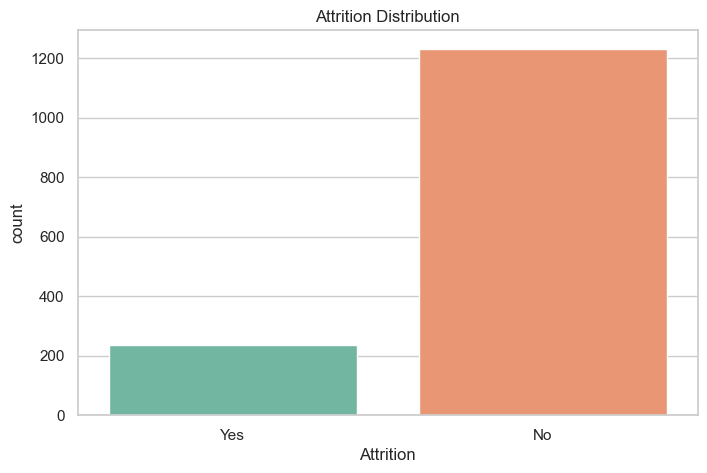

In [9]:
# Attrition Distribution
sns.countplot(x="Attrition", data=data, palette="Set2")
plt.title("Attrition Distribution")
plt.show()

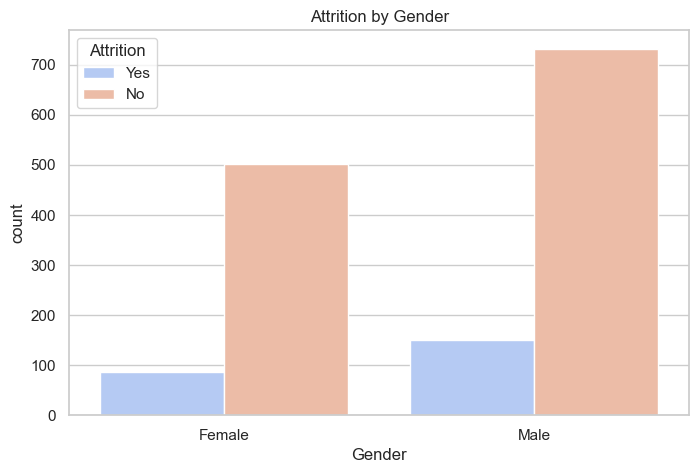

In [10]:
# Attrition by Gender
sns.countplot(x="Gender", hue="Attrition", data=data, palette="coolwarm")
plt.title("Attrition by Gender")
plt.show()

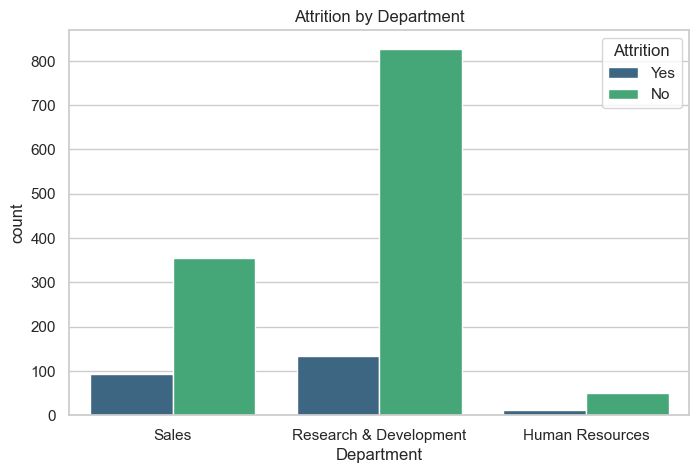

In [11]:
# Attrition by Department
sns.countplot(x="Department", hue="Attrition", data=data, palette="viridis")
plt.title("Attrition by Department")
plt.show()

C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_14984\3885812576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="MonthlyIncome", data=data, palette="magma")


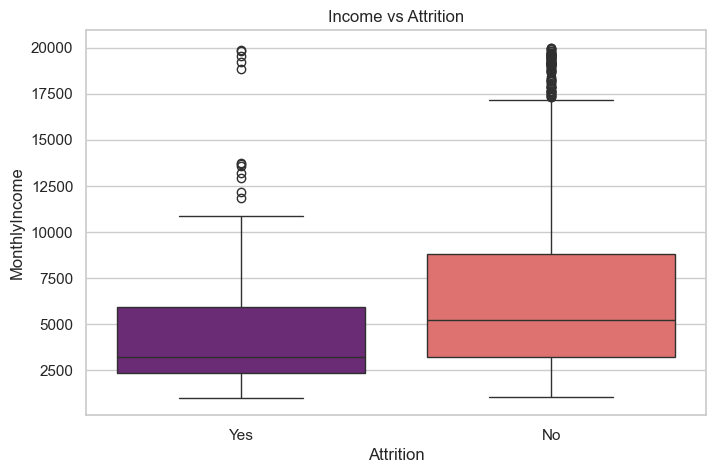

In [12]:
# Boxplot: Monthly Income vs Attrition
sns.boxplot(x="Attrition", y="MonthlyIncome", data=data, palette="magma")
plt.title("Income vs Attrition")
plt.show()

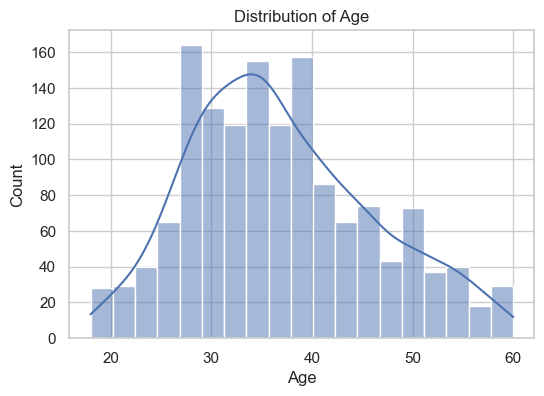

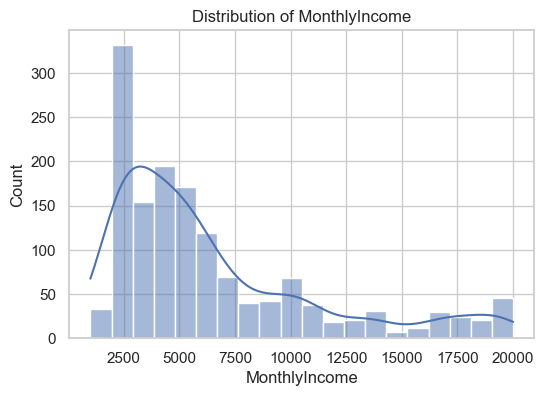

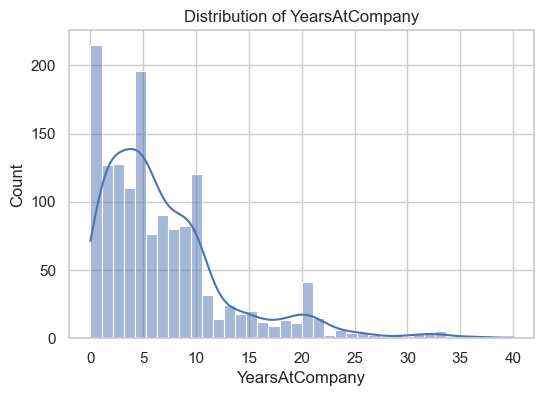

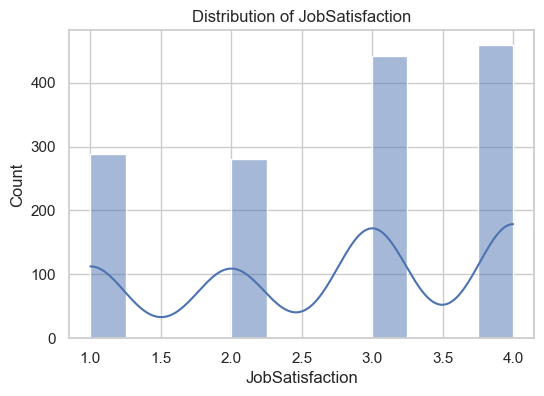

In [13]:
# Numerical distributions
num_features = ['Age','MonthlyIncome','YearsAtCompany','JobSatisfaction']
for col in num_features:
   plt.figure(figsize=(6,4))
   sns.histplot(data[col], kde=True)
   plt.title(f"Distribution of {col}")
   plt.show()

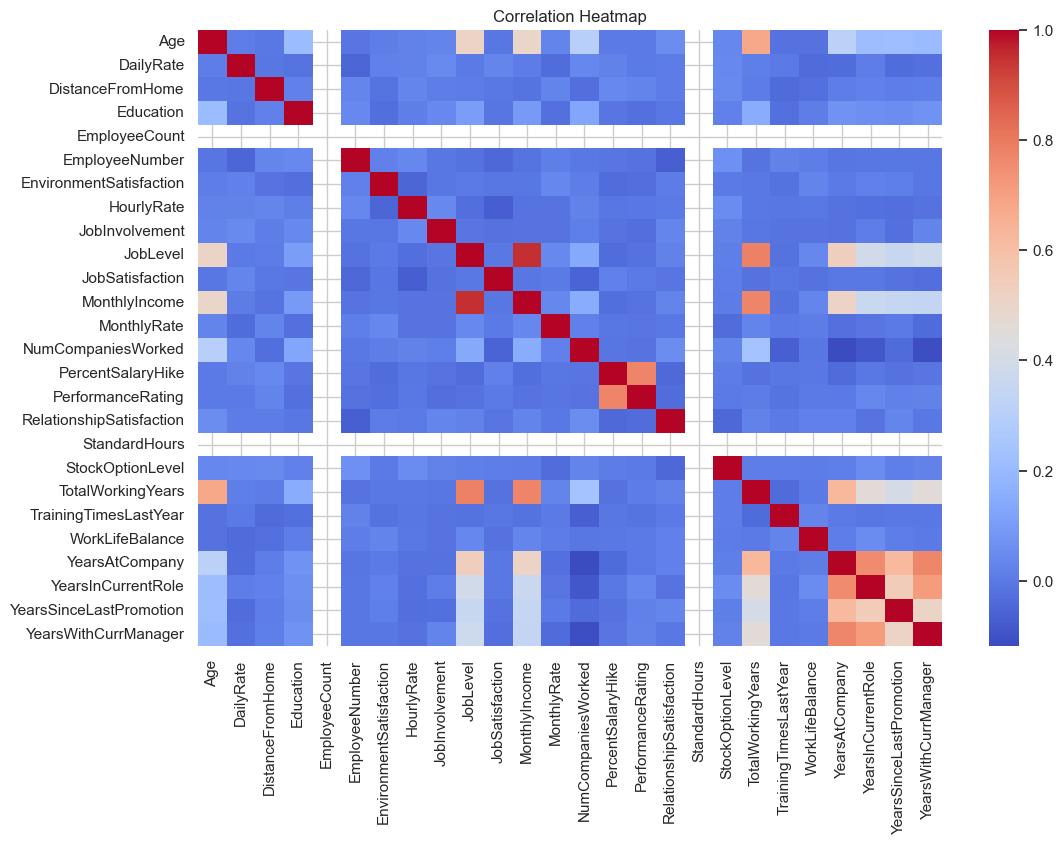

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

4. Data Preprocessing

In [16]:
# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
   data[col] = le.fit_transform(data[col])

In [17]:
# Features & Target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Logistic Regression Model

In [20]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [21]:
print("\n===== Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


===== Logistic Regression =====
Accuracy: 0.8662131519274376

Confusion Matrix:
 [[367  13]
 [ 46  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.54      0.25      0.34        61

    accuracy                           0.87       441
   macro avg       0.71      0.61      0.63       441
weighted avg       0.84      0.87      0.84       441



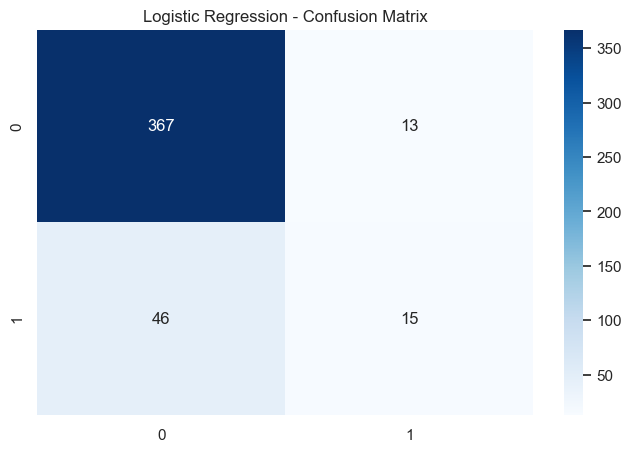

In [22]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

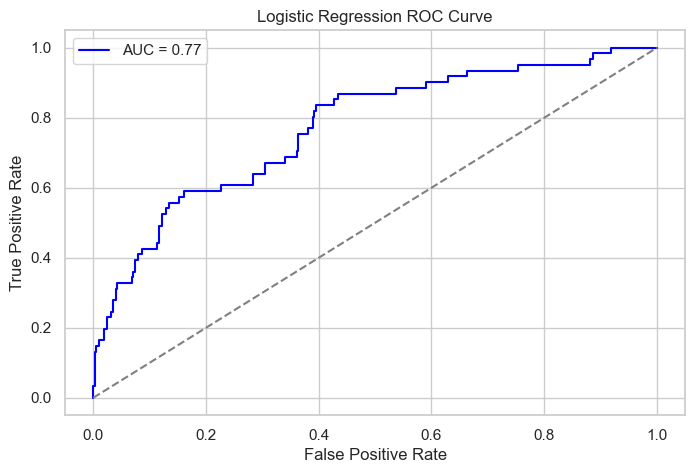

In [23]:
# ROC Curve
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="blue", label="AUC = %0.2f" % roc_auc)
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show()

6. Decision Tree Model

In [24]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [25]:
print("\n===== Decision Tree =====")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


===== Decision Tree =====
Accuracy: 0.8367346938775511

Confusion Matrix:
 [[359  21]
 [ 51  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       380
           1       0.32      0.16      0.22        61

    accuracy                           0.84       441
   macro avg       0.60      0.55      0.56       441
weighted avg       0.80      0.84      0.81       441



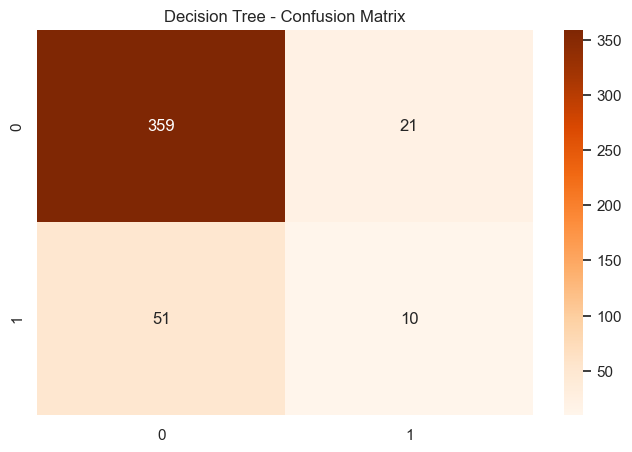

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

6. Random Forest Model

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("📌 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

📌 Random Forest Results
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.40      0.07      0.11        61

    accuracy                           0.86       441
   macro avg       0.63      0.52      0.52       441
weighted avg       0.80      0.86      0.81       441



7. Feature Importance (Decision Tree)

In [27]:
feat_importance = pd.DataFrame({
   'Feature': X.columns,
   'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

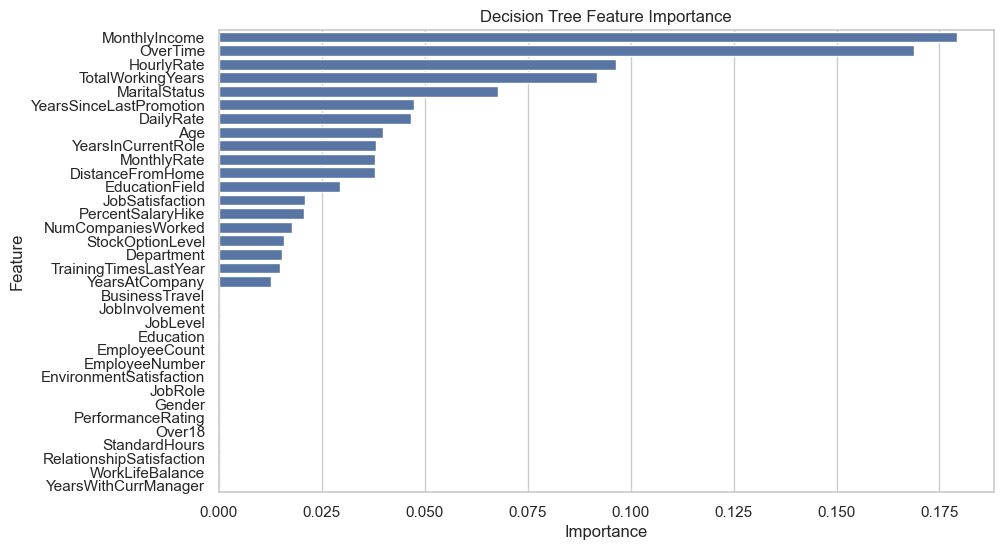

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("Decision Tree Feature Importance")
plt.show()